<a href="https://colab.research.google.com/github/shree180103/nn_classification/blob/main/nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
from sklearn.datasets import make_circles

n_samples=1000
#create circles

X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [4]:
len(X),len(y)

(1000, 1000)

In [5]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [6]:
df=pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'label':y})
df

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [8]:
df['label'].value_counts()

,count
label,
1,500
0,500


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

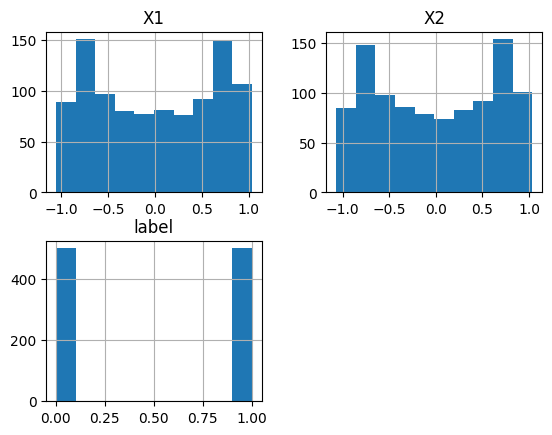

In [9]:
df.hist()

In [10]:
df.corr()

,X1,X2,label
X1,1.000000,-0.001138,-0.000765
X2,-0.001138,1.000000,0.000183
label,-0.000765,0.000183,1.000000


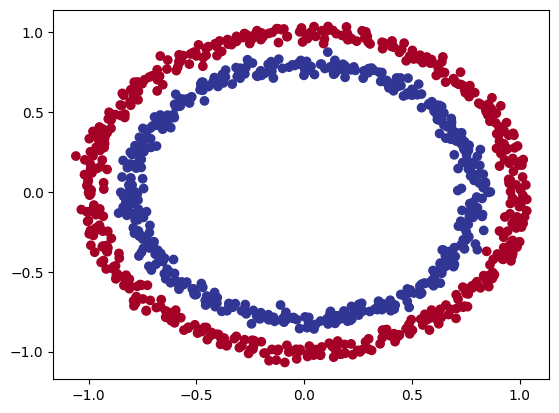

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [12]:
X.shape,y.shape

((1000, 2), (1000,))

#turn the data into tensors

In [13]:
x=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [14]:
x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

# building a model

In [16]:
from torch import nn

class CircleModel(nn.Module):
   def __init__(self):
    super().__init__()
    # create 2 linear layers
    self.layer1=nn.Linear(in_features=2,out_features=5)
    self.layer2=nn.Linear(in_features=5,out_features=1)

    def foward(self,x):
      return self.layer2(self.layer1(x)) # x -> layer1 -> layer2 -> output


In [17]:
model=CircleModel()
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.5439, -0.0201],
                      [ 0.6645,  0.5278],
                      [-0.4604, -0.7003],
                      [-0.6396,  0.6271],
                      [-0.5766, -0.5321]])),
             ('layer1.bias', tensor([0.6633, 0.2598, 0.5951, 0.6390, 0.5676])),
             ('layer2.weight',
              tensor([[-0.4354, -0.3532,  0.3368,  0.3629,  0.1985]])),
             ('layer2.bias', tensor([0.3157]))])

In [45]:
#lets replicate the model about using nn.sequential
model=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)

model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6053, -0.1171],
                      [-0.4516, -0.2695],
                      [ 0.2351, -0.4296],
                      [ 0.1931,  0.3216],
                      [-0.4047,  0.4441]])),
             ('0.bias', tensor([ 0.2659, -0.1501,  0.4319, -0.4496,  0.0660])),
             ('1.weight',
              tensor([[ 0.0113,  0.2614, -0.1047,  0.0654, -0.1683]])),
             ('1.bias', tensor([0.1651]))])

In [20]:
#making predictons
with torch.inference_mode():
  untrained_preds=model(x_test)
untrained_preds[:5]

tensor([[ 0.0140],
        [-0.0352],
        [ 0.1168],
        [-0.0150],
        [ 0.0753]])

In [47]:
loss_fn=nn.BCEWithLogitsLoss() # has sigmoid activation built in to have more accurate computation  same as tenserflow expects logits as inputs
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [46]:
# calculte accuracy

def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc


### training our model

In [26]:
model.eval()
with torch.inference_mode():
  y_logits=model(x_test)[:5]

y_logits

tensor([[ 0.0140],
        [-0.0352],
        [ 0.1168],
        [-0.0150],
        [ 0.0753]])

In [27]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5035],
        [0.4912],
        [0.5292],
        [0.4962],
        [0.5188]])

In [34]:
y_preds=torch.round(y_pred_probs)

In [31]:
y_pred_labels=torch.round(torch.sigmoid(model(x_test)[:5]))
y_pred_labels

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)

In [36]:
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 0., 1., 0., 1.])

In [57]:
# building a training and testing loops

torch.manual_seed(42)
epochs=100

for epoch in range(epochs):

  # foward pass
  y_logists=model(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logists))

  #calculate loss
  # loss=loss_fn(torch.sigmoid(y_logits),y_train)   # nn.BCEloss expects prediction probs as input
  loss=loss_fn(y_pred,y_train) # nn.BCEWithlogitloss expects raw logits as input
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ###testing
  model.eval() #turns of train mode settings
  with torch.inference_mode():
    test_logits=model(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 10==0:
    print(f"epoch: {epoch} | loss: {loss} , acc: {acc:.2f}% | test loss: {test_loss:.5f} , test acc:{test_acc:.2f}%")







epoch: 0 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.86526 , test acc:50.00%
epoch: 10 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.86526 , test acc:50.00%
epoch: 20 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.86526 , test acc:50.00%
epoch: 30 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.86526 , test acc:50.00%
epoch: 40 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.86526 , test acc:50.00%
epoch: 50 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.86526 , test acc:50.00%
epoch: 60 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.86526 , test acc:50.00%
epoch: 70 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.86526 , test acc:50.00%
epoch: 80 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.86526 , test acc:50.00%
epoch: 90 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.86526 , test acc:50.00%


In [62]:
from urllib import request
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper functions already exists")
else:
  print("downloading helper functions")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions,plot_decision_boundary


helper functions already exists


Text(0.5, 1.0, 'test')

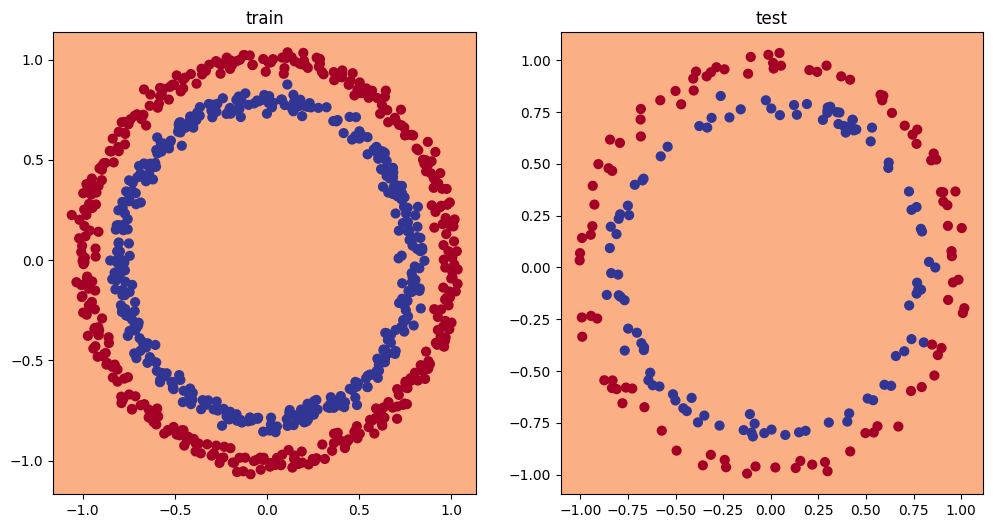

In [65]:
#plot descion boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model,x_train,y_train)
plt.title("train")
plt.subplot(1,2,2)
plot_decision_boundary(model,x_test,y_test)
plt.title("test")


# improving our model

In [75]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    # z=self.layer1(x)
    # z=self.layer2(z)
    # z=self.layer3(z)
    return self.layer3(self.layer2(self.layer1(x))) # this is the above code in # but in one line to speed up process

model1=CircleModelV1()
model1


CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [76]:
model1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [81]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.1)

In [82]:
torch.manual_seed(42)

epochs=1000

for epoch in range(epochs):
  model.train()
  # foward prop
  y_logists=model1(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logists))

  # calculate loss
  loss=loss_fn(y_logists,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ## training
  model1.eval() #turns of train mode settings
  with torch.inference_mode():
    test_logits=model1(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 100==0:
    print(f"epoch: {epoch} | loss: {loss} , acc: {acc:.2f}% | test loss: {test_loss:.5f} , test acc:{test_acc:.2f}%")





epoch: 0 | loss: 0.6939550638198853 , acc: 50.88% | test loss: 0.69261 , test acc:51.00%
epoch: 100 | loss: 0.6930477619171143 , acc: 50.38% | test loss: 0.69379 , test acc:48.00%
epoch: 200 | loss: 0.692986011505127 , acc: 51.12% | test loss: 0.69437 , test acc:46.00%
epoch: 300 | loss: 0.6929805278778076 , acc: 51.62% | test loss: 0.69458 , test acc:45.00%
epoch: 400 | loss: 0.6929798722267151 , acc: 51.12% | test loss: 0.69465 , test acc:46.00%
epoch: 500 | loss: 0.6929798722267151 , acc: 51.00% | test loss: 0.69467 , test acc:46.00%
epoch: 600 | loss: 0.6929798722267151 , acc: 51.00% | test loss: 0.69468 , test acc:46.00%
epoch: 700 | loss: 0.6929798722267151 , acc: 51.00% | test loss: 0.69468 , test acc:46.00%
epoch: 800 | loss: 0.6929798722267151 , acc: 51.00% | test loss: 0.69468 , test acc:46.00%
epoch: 900 | loss: 0.6929798126220703 , acc: 51.00% | test loss: 0.69468 , test acc:46.00%


### intoducing non linearity
